# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import pickle
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

# Dataset Description

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.duplicated().sum()

723

there are many duplicted data(723) we will drop it

In [7]:
data=data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

# EDA

In [9]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

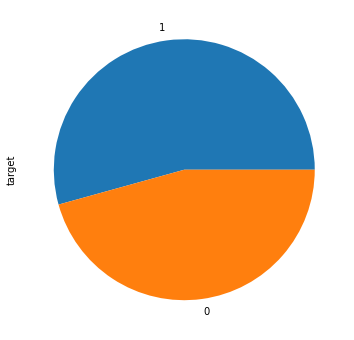

In [10]:
data.target.value_counts().plot(kind='pie', figsize=(14,6))

pepole that have heart disease : 164
pepole that doesn't have heart disease : 138

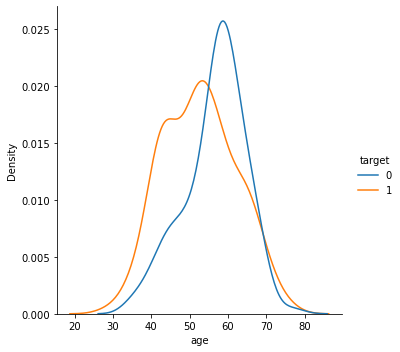

In [11]:
sns.displot(data=data, x='age',hue='target',kind='kde')

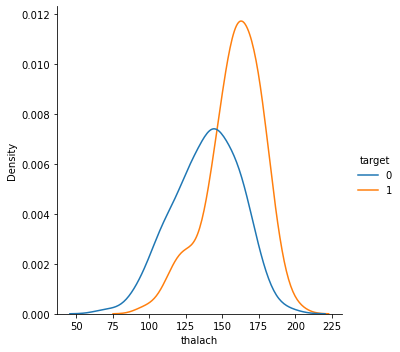

In [12]:
sns.displot(data=data, x='thalach',hue='target',kind='kde')

maximum heart rate achieved affect on output hence the healthy people normal distribution between 110 - 160 
and people that have heart disease normal distribution between 150 - 180

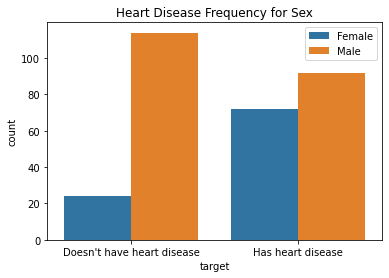

In [14]:
fig = sns.countplot(x = 'target', data = data, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

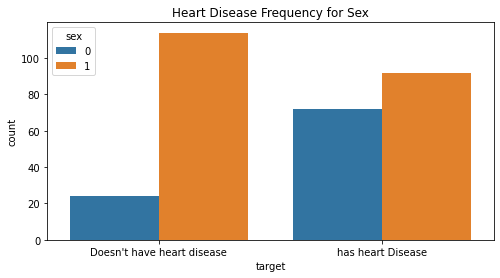

In [15]:
plt.figure(figsize=(8,4))
fig=sns.countplot(data=data,x='target',hue='sex')
fig.set_xticklabels(labels=["Doesn't have heart disease","has heart Disease" ])
plt.title("Heart Disease Frequency for Sex");


## Correlations Heatmaps

<AxesSubplot:>

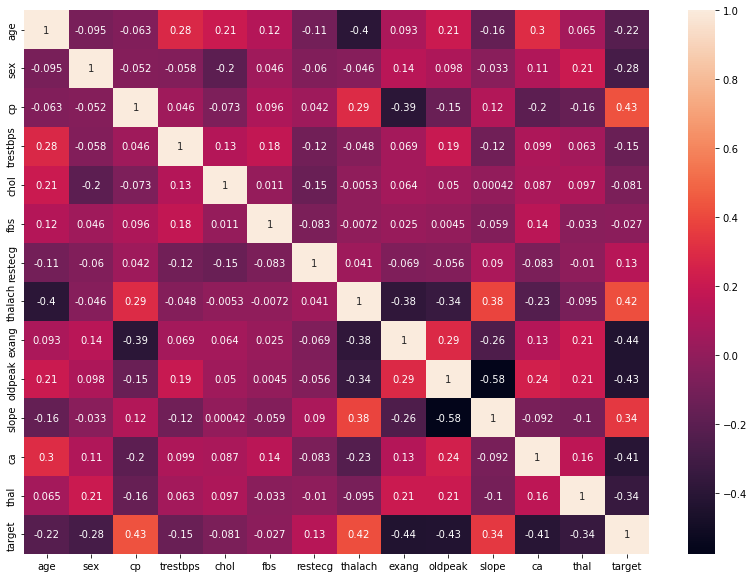

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(data=data.corr(),annot=True)

- Correlation between features is weak at best
- features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina max_heart_rate_achieved and st_depression. We will see which features will appear as imporatnt by the classification models.

# Modeling

### split data

In [17]:
X = data.iloc[:,:-1]

In [18]:
y=data.iloc[:,-1]

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
print(len(X))
X.head()

In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state = 20)

## Logistic Regression 

In [71]:
LR_clf=LogisticRegression(max_iter = 1000, random_state = 4)
LR_clf.fit(X_train,y_train)
LR_score=LR_clf.score(X_test,y_test)
LR_score

0.9344262295081968

## Tuning Logistic Regression

In [80]:
LR_grid = {'C': np.logspace(-5, 5),
            'solver': ['liblinear'],
            'max_iter': np.arange(1000, 2000, 100),
            'penalty':['l1', 'l2']
           }

LR_gscv= GridSearchCV(LogisticRegression(),param_grid=LR_grid,cv=5,verbose=True)
LR_gscv.fit(X_train,y_train)
LR_score_gscv=LR_gscv.score(X_test,y_test)
LR_score_gscv

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


0.9344262295081968

In [81]:
LR_gscv.best_params_

{'C': 0.49417133613238384,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

### KNeighbors Classifier

In [77]:
KN_clf=KNeighborsClassifier()
KN_clf.fit(X_train,y_train)
KN_score= KN_clf.score(X_test,y_test)
KN_score

0.6885245901639344

### Tuning KNeighbors Classifier

In [79]:
KN_grid={'n_neighbors': np.arange(2, 15),'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
         'p':[1,2,3,4,5],'algorithm': ['auto', 'ball_tree', 'kd_tree']}

KN_gscv=GridSearchCV(KNeighborsClassifier(),param_grid=KN_grid,verbose=True)

KN_gscv.fit(X_train,y_train)
KN_score_gscv=KN_gscv.score(X_test,y_test)
KN_score_gscv

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


0.6721311475409836

In [82]:
KN_gscv.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 10, 'p': 1}

### Support Vector Classifier

In [83]:
SV_clf=svm.SVC()
SV_clf.fit(X_train,y_train)
SV_score=SV_clf.score(X_test,y_test)
SV_score

0.6885245901639344

### Tuning support vector classifier 

In [84]:
svc_grid = {'C': np.logspace(-5, 5, 20),'kernel': ['rbf'],'degree': [2,3,4] }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31), param_grid=svc_grid, cv=5, verbose=True)
svc_gscv.fit(X_train,y_train)
svc_score_gscv=svc_gscv.score(X_test,y_test)
svc_score_gscv

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.8524590163934426

In [86]:
svc_gscv.best_params_

{'C': 2636.6508987303555, 'degree': 2, 'kernel': 'rbf'}

### Random Forest

In [87]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train,y_train)
RF_score=RF_clf.score(X_test,y_test)
RF_score

0.8360655737704918

### Gradien Boosting Classifier

In [88]:
GB_clf=GradientBoostingClassifier()
GB_clf.fit(X_train,y_train)
GB_score=GB_clf.score(X_test,y_test)
GB_score

0.7868852459016393

### tunned Gradien Boosting Classifier

In [95]:
# create a dictionary with all scores
score = [{'Model':'Logistic Regression', 'Score': LR_score, 'Tuned_score': LR_score_gscv}, 
         {'Model':'SVC', 'Score': SV_score, 'Tuned_score': svc_score_gscv},
         {'Model':'KNN', 'Score': KN_score, 'Tuned_score': KN_score_gscv},
         {'Model':'Gradient Boosting', 'Score': GB_score},
         {'Model':'Random Forest', 'Score': RF_score}]

In [96]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.934426,0.934426
1,SVC,0.688525,0.852459
2,KNN,0.688525,0.672131
3,Gradient Boosting,0.786885,NaN
4,Random Forest,0.836066,NaN


best model is Logistic Regration

In [99]:
# saving trained model
filename = 'diabetes.sav'
pickle.dump(LR_clf, open(filename, 'wb'))